In [1]:
from tensorflow.keras.models import load_model
import cv2
from imutils import paths
import imutils
import random
import numpy as np
from skimage import transform
from skimage import exposure
from skimage import io
import os

In [2]:
saved_model_path = r"./output/trafficsignnet.model"

model = load_model(saved_model_path)


In [3]:
# load the label names
labelNames = open("signnames.csv").read().strip().split("\n")[1:]
labelNames = [l.split(",")[1] for l in labelNames]

In [4]:
print("Predicting...")
imagePaths = list(paths.list_images(r'./gtsrb-german-traffic-sign/Test'))[:25]
random.shuffle(imagePaths)
imagePaths = imagePaths
labels = []
images = []
for (i, imagePath) in enumerate(imagePaths):
    
    images.append(imagePath)
    image = io.imread(imagePath)

    image = transform.resize(image, (32, 32))
    image = exposure.equalize_adapthist(image, clip_limit=0.1)
    image = image.astype("float32") / 255.0
    
    image = np.expand_dims(image, axis=0)
    preds = model.predict(image)
    
    j = preds.argmax(axis=1)[0]
    
    label = labelNames[j]
    labels.append(label)
    
#     image = cv2.imread(imagePath)
#     image = imutils.resize(image, width=100)    

print("Done")

Predicting...


C:\Users\batman\Anaconda3\envs\tensorflow\lib\site-packages\skimage\util\dtype.py:135: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))


Done


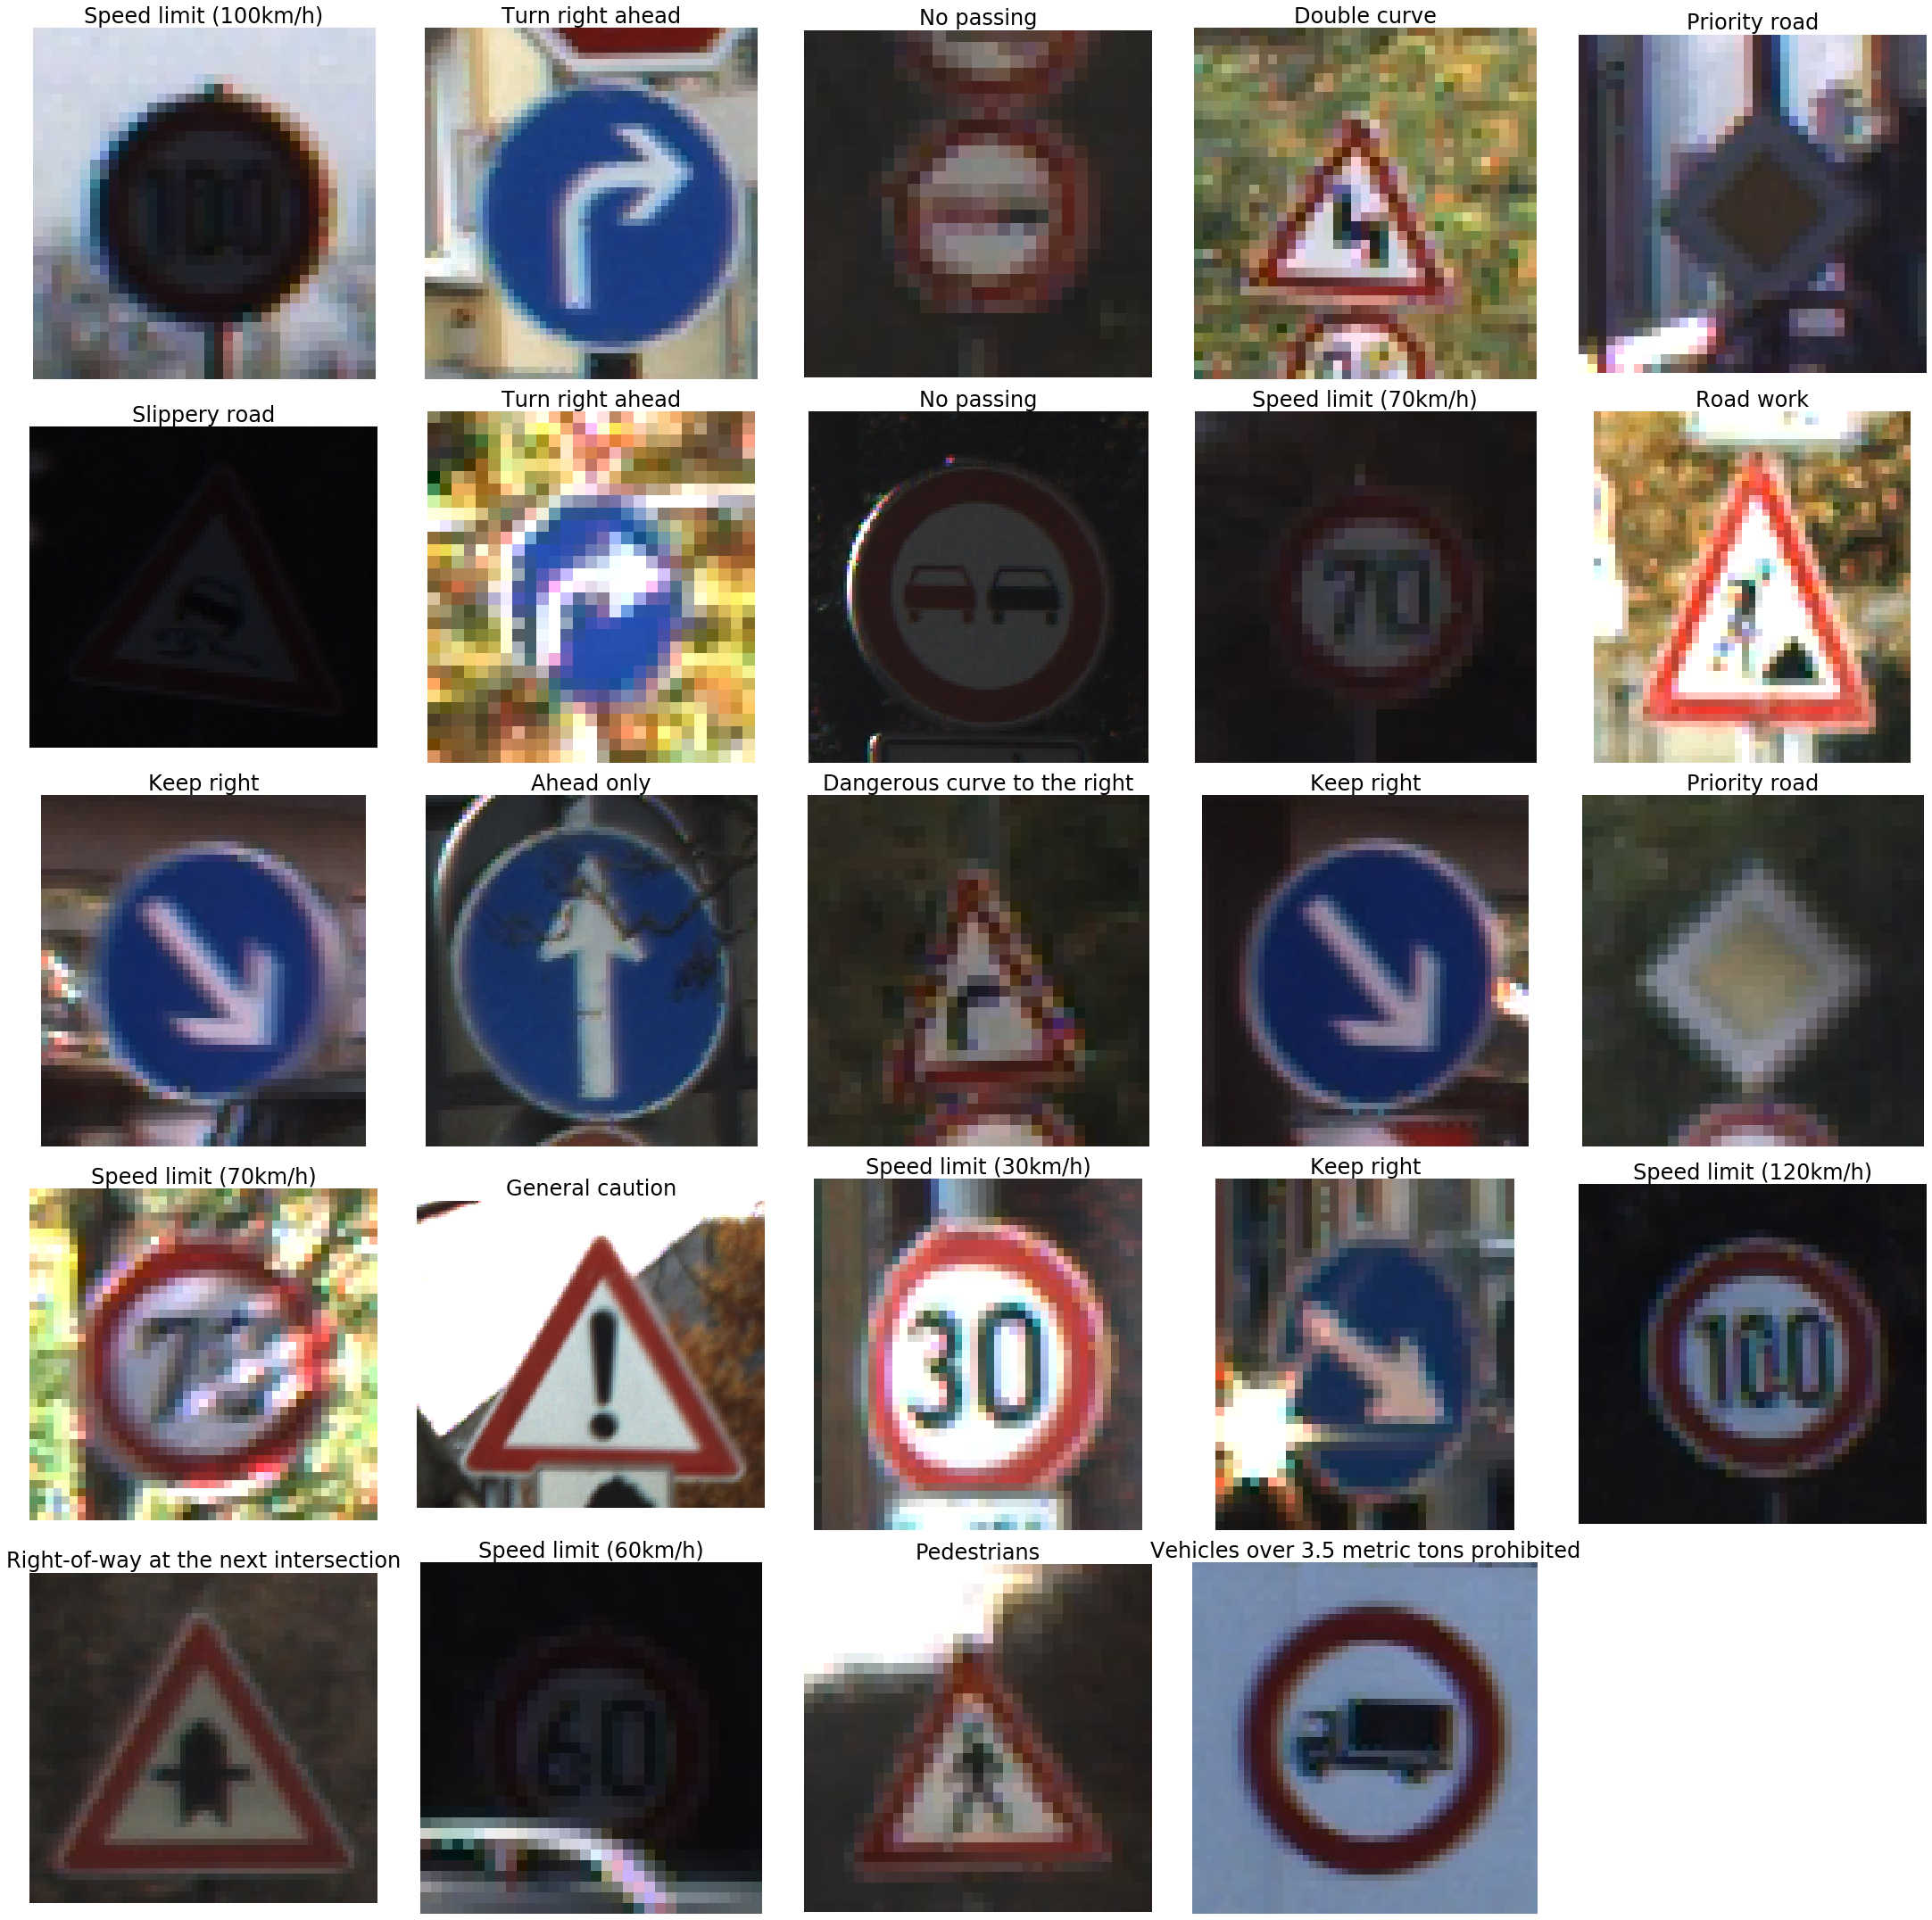

In [5]:
%matplotlib inline


import matplotlib.pyplot as plt
import matplotlib.image as mpimg

plt.figure(figsize=(30, 30))

imag_index = 0
label_index = 0

for i in range(1, len(images)):
    plt.subplot(5, 5, i)
    
    imag = f"{images[imag_index]}"
    
    plt.imshow(mpimg.imread(imag), interpolation="nearest")
    
    plt.title(labels[label_index], fontsize= 24)
    imag_index += 1
    label_index += 1
    plt.axis("off")
    plt.tight_layout()

plt.show()